In [1]:
#%pip install missingno

In [2]:
# Install required libraries if not already installed
#!pip install pandas numpy matplotlib seaborn missingno

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [4]:

# File paths
file_paths = {
    "User Data": "../data/user_data.csv",
    "Booking History": "../data/booking_history.csv",
    "Train Schedule": "../data/train_schedule.csv",
    "Pricing Data": "../data/pricing_data.csv",
    "Contextual Data": "../data/contextual_data.csv",
    "Transaction Data": "../data/transaction_data.csv",
    "Feedback Data": "../data/feedback_data.csv",
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display first few rows of each dataset
for name, df in datasets.items():
    print(f"\n📌 First 5 rows of {name}:")
    display(df.head())



📌 First 5 rows of User Data:


,User ID,Age,Gender,Location,Preferred Class,Loyalty Status
0,6f170d7c-9ed9-4dec-a52a-e493d83d1abc,52,Male,South Ashley,Sleeper,Bronze
1,d5301664-836a-440f-9516-4be0fd59d46e,30,Other,Thompsontown,Economy,Bronze
2,81d1d908-7fe7-4d04-98c6-8741c903afb3,32,Male,East Becky,Economy,Bronze
3,9bdea446-5a45-4682-8478-84db3bbfbdce,54,Other,East Nancy,Economy,Gold
4,b60dd382-62ae-4942-94d1-30cba864bd3b,40,Female,Huffmanmouth,Business,Gold



📌 First 5 rows of Booking History:


,User ID,Train Name,Departure,Arrival,Date,Ticket Price,Seat Preference
0,9bdea446-5a45-4682-8478-84db3bbfbdce,Superfast,CityA,CityD,2024-09-03,23.92,Aisle
1,81d1d908-7fe7-4d04-98c6-8741c903afb3,Superfast,CityI,CityH,2024-11-24,166.41,Aisle
2,b60dd382-62ae-4942-94d1-30cba864bd3b,Intercity,CityA,CityF,2024-06-06,175.17,No Preference
3,81d1d908-7fe7-4d04-98c6-8741c903afb3,Night Train,CityG,CityJ,2024-12-14,59.23,Aisle
4,b60dd382-62ae-4942-94d1-30cba864bd3b,Superfast,CityE,CityF,2024-05-23,41.02,Aisle



📌 First 5 rows of Train Schedule:


,Train Name,Departure Station,Arrival Station,Departure Time,Arrival Time,Duration (hrs),Seat Availability
0,Express,CityI,CityF,13:53:09,16:03:34,10,96
1,Express,CityA,CityJ,03:46:56,23:35:11,9,49
2,Superfast,CityA,CityH,06:52:18,04:25:47,10,92
3,Superfast,CityA,CityH,06:30:47,13:04:48,11,44
4,Night Train,CityG,CityD,10:59:43,19:36:05,10,9



📌 First 5 rows of Pricing Data:


,Train Name,Class,Base Price,Surge Price,Final Price,Final_Price
0,Express,Business,143.98,34.28,<function <lambda> at 0x11e550040>,178.26
1,Regional,Economy,140.21,24.44,<function <lambda> at 0x11e550040>,164.65
2,Night Train,Sleeper,112.70,32.18,<function <lambda> at 0x11e550040>,144.88
3,Express,Economy,79.67,10.18,<function <lambda> at 0x11e550040>,89.85
4,Regional,Business,115.70,19.15,<function <lambda> at 0x11e550040>,134.85



📌 First 5 rows of Contextual Data:


,Route,Weather Condition,Delay (mins)
0,"('CityA', 'CityB')",Rainy,45
1,"('CityA', 'CityB')",Snowy,30
2,"('CityI', 'CityJ')",Foggy,5
3,"('CityC', 'CityD')",Snowy,45
4,"('CityI', 'CityJ')",Clear,15



📌 First 5 rows of Transaction Data:


,User ID,Payment Method,Amount Paid,Transaction Status
0,b60dd382-62ae-4942-94d1-30cba864bd3b,PayPal,158.58,Failed
1,d5301664-836a-440f-9516-4be0fd59d46e,Digital Wallet,93.72,Failed
2,6f170d7c-9ed9-4dec-a52a-e493d83d1abc,Digital Wallet,199.11,Failed
3,b60dd382-62ae-4942-94d1-30cba864bd3b,Bank Transfer,19.85,Failed
4,b60dd382-62ae-4942-94d1-30cba864bd3b,Credit Card,25.79,Failed



📌 First 5 rows of Feedback Data:


,User ID,Train Name,Rating,Feedback
0,9bdea446-5a45-4682-8478-84db3bbfbdce,Night Train,3,"Enjoyed the journey, but the food options were..."
1,81d1d908-7fe7-4d04-98c6-8741c903afb3,Night Train,4,Had difficulty understanding the announcements.
2,6f170d7c-9ed9-4dec-a52a-e493d83d1abc,Express,2,"Announcements were clear, and the ride was pea..."
3,81d1d908-7fe7-4d04-98c6-8741c903afb3,Regional,1,"Too noisy, especially near the engine section."
4,b60dd382-62ae-4942-94d1-30cba864bd3b,Superfast,2,"The staff was helpful, but the train was delayed."



# ---------------------------------
# Step 1: Data Summary
# ---------------------------------


In [5]:
for name, df in datasets.items():
    print(f"\n📊 Summary of {name}:\n")
    print(df.info())
    print("\nDescriptive Statistics:\n")
    display(df.describe(include="all"))  # Show both numerical and categorical insights



📊 Summary of User Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          5 non-null      object
 1   Age              5 non-null      int64 
 2   Gender           5 non-null      object
 3   Location         5 non-null      object
 4   Preferred Class  5 non-null      object
 5   Loyalty Status   5 non-null      object
dtypes: int64(1), object(5)
memory usage: 372.0+ bytes
None

Descriptive Statistics:



,User ID,Age,Gender,Location,Preferred Class,Loyalty Status
count,5,5.000000,5,5,5,5
unique,5,NaN,3,5,3,2
top,6f170d7c-9ed9-4dec-a52a-e493d83d1abc,NaN,Male,South Ashley,Economy,Bronze
freq,1,NaN,2,1,3,3
mean,NaN,41.600000,NaN,NaN,NaN,NaN
std,NaN,11.081516,NaN,NaN,NaN,NaN
min,NaN,30.000000,NaN,NaN,NaN,NaN
25%,NaN,32.000000,NaN,NaN,NaN,NaN
50%,NaN,40.000000,NaN,NaN,NaN,NaN
75%,NaN,52.000000,NaN,NaN,NaN,NaN



📊 Summary of Booking History:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          100 non-null    object 
 1   Train Name       100 non-null    object 
 2   Departure        100 non-null    object 
 3   Arrival          100 non-null    object 
 4   Date             100 non-null    object 
 5   Ticket Price     100 non-null    float64
 6   Seat Preference  100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB
None

Descriptive Statistics:



,User ID,Train Name,Departure,Arrival,Date,Ticket Price,Seat Preference
count,100,100,100,100,100,100.000000,100
unique,5,5,5,5,83,NaN,3
top,81d1d908-7fe7-4d04-98c6-8741c903afb3,Intercity,CityC,CityJ,2024-11-03,NaN,No Preference
freq,22,29,24,28,3,NaN,38
mean,NaN,NaN,NaN,NaN,NaN,102.879900,NaN
std,NaN,NaN,NaN,NaN,NaN,55.574724,NaN
min,NaN,NaN,NaN,NaN,NaN,12.510000,NaN
25%,NaN,NaN,NaN,NaN,NaN,56.245000,NaN
50%,NaN,NaN,NaN,NaN,NaN,100.075000,NaN
75%,NaN,NaN,NaN,NaN,NaN,150.120000,NaN



📊 Summary of Train Schedule:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Train Name         100 non-null    object
 1   Departure Station  100 non-null    object
 2   Arrival Station    100 non-null    object
 3   Departure Time     100 non-null    object
 4   Arrival Time       100 non-null    object
 5   Duration (hrs)     100 non-null    int64 
 6   Seat Availability  100 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 5.6+ KB
None

Descriptive Statistics:



,Train Name,Departure Station,Arrival Station,Departure Time,Arrival Time,Duration (hrs),Seat Availability
count,100,100,100,100,100,100.000000,100.00000
unique,5,5,5,100,100,NaN,NaN
top,Regional,CityG,CityD,13:53:09,16:03:34,NaN,NaN
freq,24,27,24,1,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.550000,49.55000
std,NaN,NaN,NaN,NaN,NaN,2.965713,28.11426
min,NaN,NaN,NaN,NaN,NaN,2.000000,0.00000
25%,NaN,NaN,NaN,NaN,NaN,5.000000,28.00000
50%,NaN,NaN,NaN,NaN,NaN,8.000000,52.50000
75%,NaN,NaN,NaN,NaN,NaN,10.000000,71.00000



📊 Summary of Pricing Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Train Name   100 non-null    object 
 1   Class        100 non-null    object 
 2   Base Price   100 non-null    float64
 3   Surge Price  100 non-null    float64
 4   Final Price  100 non-null    object 
 5   Final_Price  100 non-null    float64
dtypes: float64(3), object(3)
memory usage: 4.8+ KB
None

Descriptive Statistics:



,Train Name,Class,Base Price,Surge Price,Final Price,Final_Price
count,100,100,100.00000,100.000000,100,100.000000
unique,5,3,NaN,NaN,1,NaN
top,Intercity,Economy,NaN,NaN,<function <lambda> at 0x11e550040>,NaN
freq,25,37,NaN,NaN,100,NaN
mean,NaN,NaN,90.69080,25.297600,NaN,115.988400
std,NaN,NaN,42.24309,13.874541,NaN,46.113361
min,NaN,NaN,11.65000,0.900000,NaN,12.970000
25%,NaN,NaN,55.16750,13.840000,NaN,80.245000
50%,NaN,NaN,99.40500,26.080000,NaN,116.290000
75%,NaN,NaN,130.30250,36.755000,NaN,158.997500



📊 Summary of Contextual Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Route              100 non-null    object
 1   Weather Condition  100 non-null    object
 2   Delay (mins)       100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None

Descriptive Statistics:



,Route,Weather Condition,Delay (mins)
count,100,100,100.00000
unique,5,5,NaN
top,"('CityI', 'CityJ')",Rainy,NaN
freq,28,27,NaN
mean,NaN,NaN,19.45000
std,NaN,NaN,18.97493
min,NaN,NaN,0.00000
25%,NaN,NaN,5.00000
50%,NaN,NaN,10.00000
75%,NaN,NaN,30.00000



📊 Summary of Transaction Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             100 non-null    object 
 1   Payment Method      100 non-null    object 
 2   Amount Paid         100 non-null    float64
 3   Transaction Status  100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Descriptive Statistics:



,User ID,Payment Method,Amount Paid,Transaction Status
count,100,100,100.000000,100
unique,5,5,NaN,3
top,b60dd382-62ae-4942-94d1-30cba864bd3b,Credit Card,NaN,Failed
freq,23,24,NaN,35
mean,NaN,NaN,104.531400,NaN
std,NaN,NaN,57.975068,NaN
min,NaN,NaN,11.180000,NaN
25%,NaN,NaN,55.040000,NaN
50%,NaN,NaN,102.395000,NaN
75%,NaN,NaN,154.665000,NaN



📊 Summary of Feedback Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     100 non-null    object
 1   Train Name  100 non-null    object
 2   Rating      100 non-null    int64 
 3   Feedback    100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
None

Descriptive Statistics:



,User ID,Train Name,Rating,Feedback
count,100,100,100.000000,100
unique,5,5,NaN,20
top,81d1d908-7fe7-4d04-98c6-8741c903afb3,Night Train,NaN,"Announcements were clear, and the ride was pea..."
freq,25,24,NaN,7
mean,NaN,NaN,2.890000,NaN
std,NaN,NaN,1.369915,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2.000000,NaN
50%,NaN,NaN,3.000000,NaN
75%,NaN,NaN,4.000000,NaN



# ---------------------------------
# Step 2: Checking for Missing Values
# ---------------------------------


In [6]:
print("\n🔍 Missing Values Analysis:\n")
for name, df in datasets.items():
    missing_count = df.isnull().sum()
    if missing_count.any():
        print(f"\n{name} has missing values:")
        print(missing_count[missing_count > 0])
    else:
        print(f"\n{name} has no missing values.")




🔍 Missing Values Analysis:


User Data has no missing values.

Booking History has no missing values.

Train Schedule has no missing values.

Pricing Data has no missing values.

Contextual Data has no missing values.

Transaction Data has no missing values.

Feedback Data has no missing values.


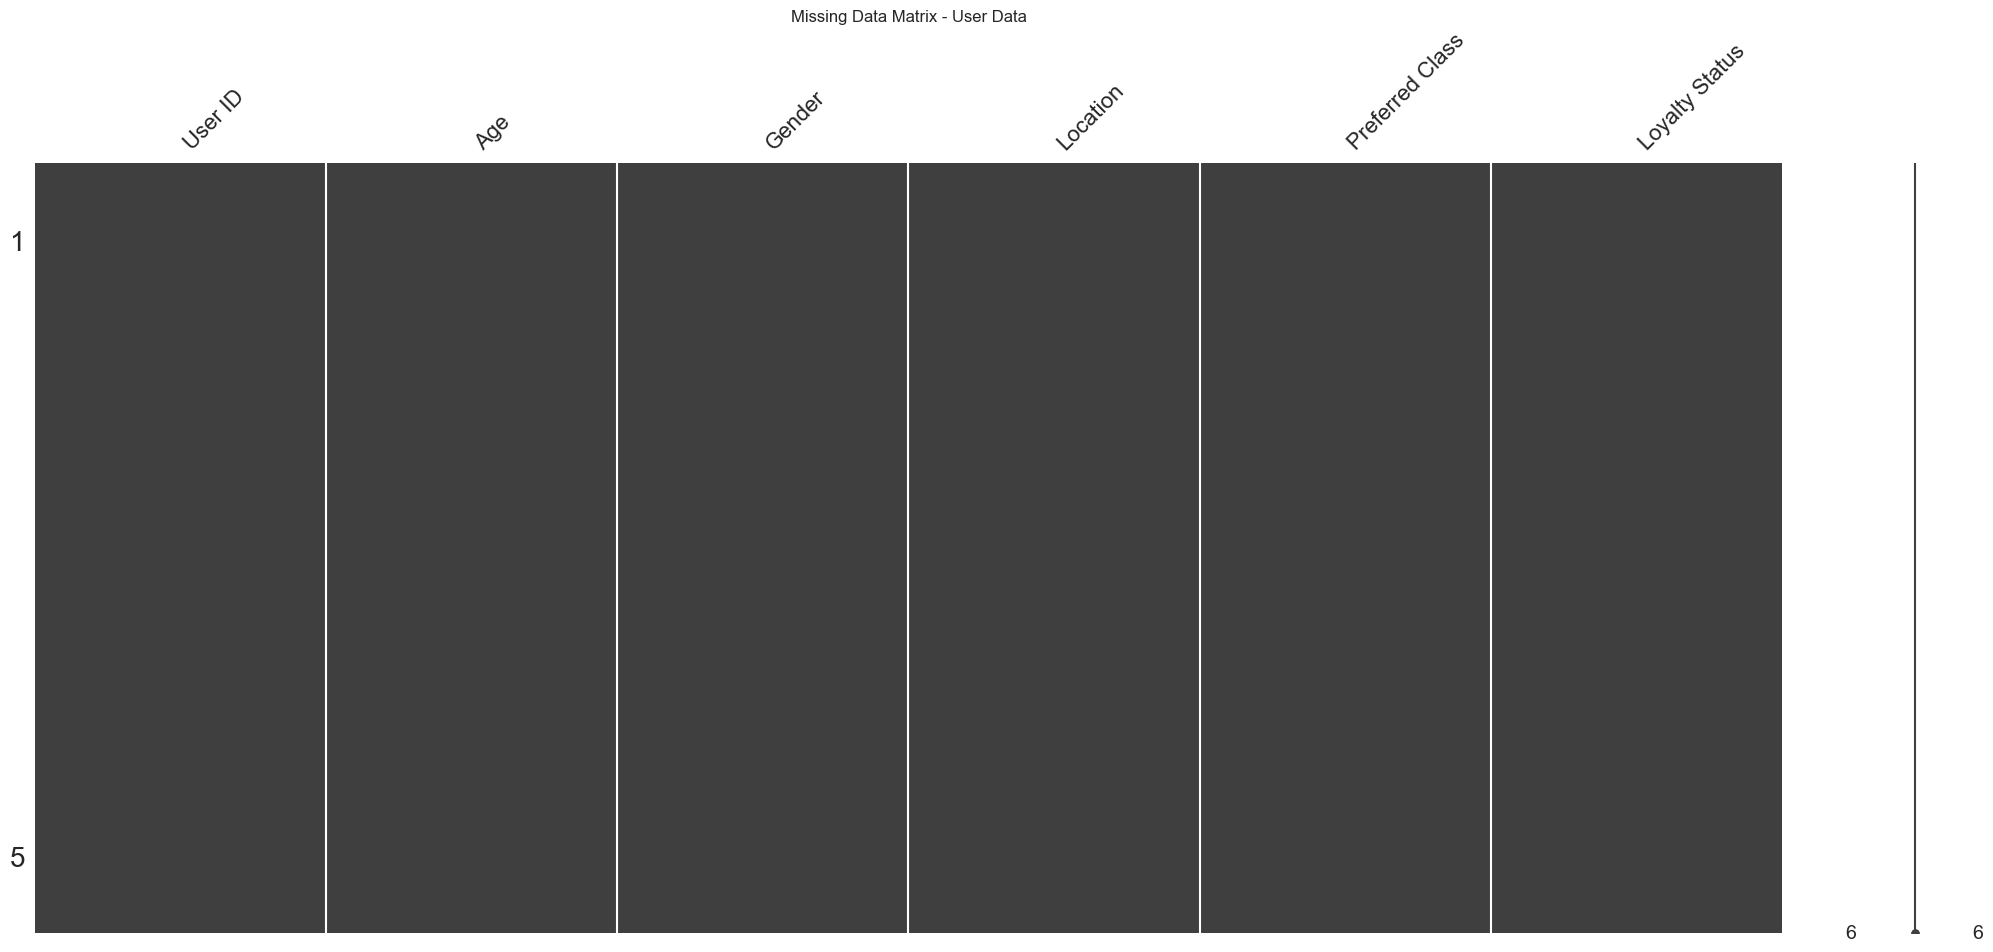

In [7]:
# Visualizing missing data
msno.matrix(datasets["User Data"])
plt.title("Missing Data Matrix - User Data")
plt.show()


# ---------------------------------
# Step 3: Data Distributions
# ---------------------------------


In [8]:

# Convert necessary columns to numeric if they exist
for dataset in ["User Data", "Booking History", "Pricing Data"]:
    if dataset in datasets:
        for col in ["Age", "Ticket Price", "Base Price", "Surge Price", "Final Price"]:
            if col in datasets[dataset].columns:
                datasets[dataset][col] = pd.to_numeric(datasets[dataset][col], errors="coerce")


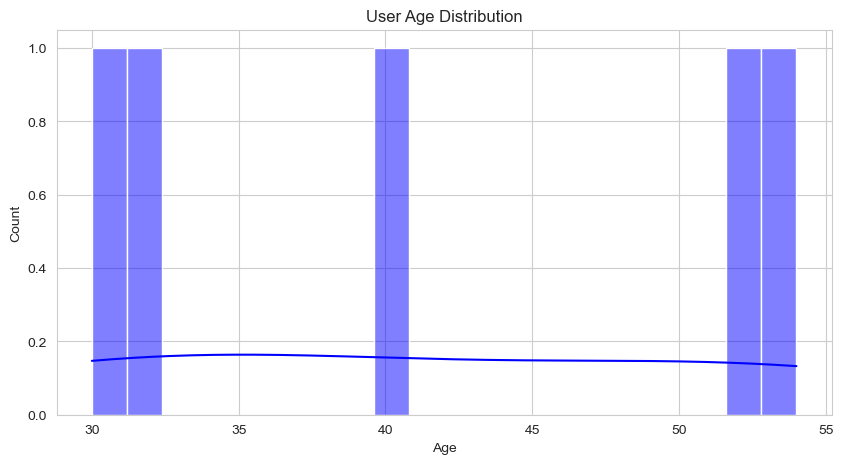

In [9]:

# Age Distribution
if "Age" in datasets["User Data"].columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(datasets["User Data"]["Age"], bins=20, kde=True, color="blue")
    plt.title("User Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

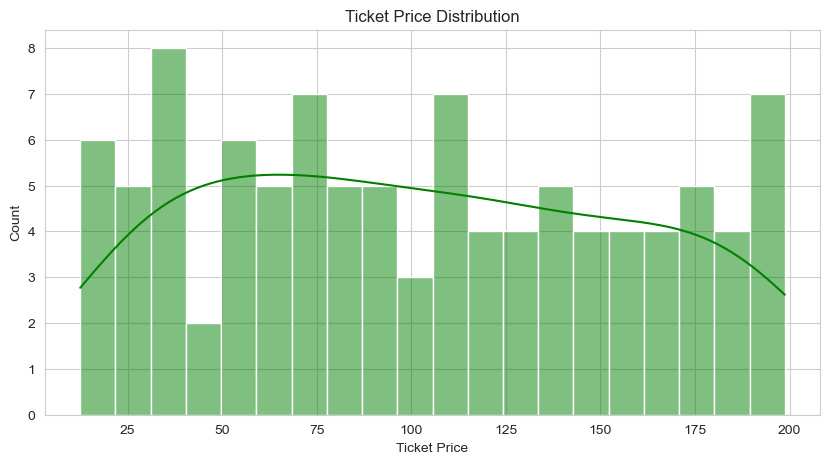

In [10]:
# Ticket Price Distribution
if "Ticket Price" in datasets["Booking History"].columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(datasets["Booking History"]["Ticket Price"], bins=20, kde=True, color="green")
    plt.title("Ticket Price Distribution")
    plt.xlabel("Ticket Price")
    plt.ylabel("Count")
    plt.show()


/var/folders/cr/zw_bcxpn257g4khbkhrtn_vm0000gn/T/ipykernel_17778/2483166196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets["User Data"]["Preferred Class"], palette="Set2")


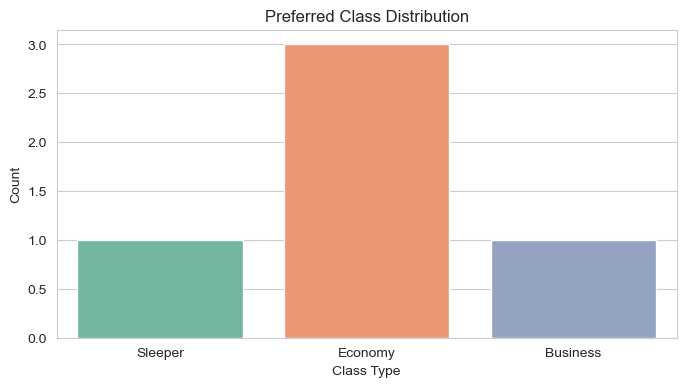

In [11]:
# Preferred Class Distribution
if "Preferred Class" in datasets["User Data"].columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=datasets["User Data"]["Preferred Class"], palette="Set2")
    plt.title("Preferred Class Distribution")
    plt.xlabel("Class Type")
    plt.ylabel("Count")
    plt.show()


/var/folders/cr/zw_bcxpn257g4khbkhrtn_vm0000gn/T/ipykernel_17778/854967960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets["Transaction Data"]["Payment Method"], palette="coolwarm")


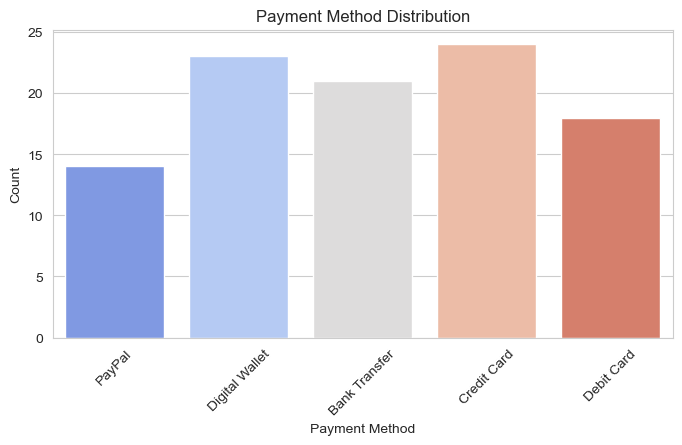

In [12]:
# Payment Method Distribution
if "Payment Method" in datasets["Transaction Data"].columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=datasets["Transaction Data"]["Payment Method"], palette="coolwarm")
    plt.title("Payment Method Distribution")
    plt.xlabel("Payment Method")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


# ---------------------------------
# Step 4: Insights into User Behavior
# ---------------------------------


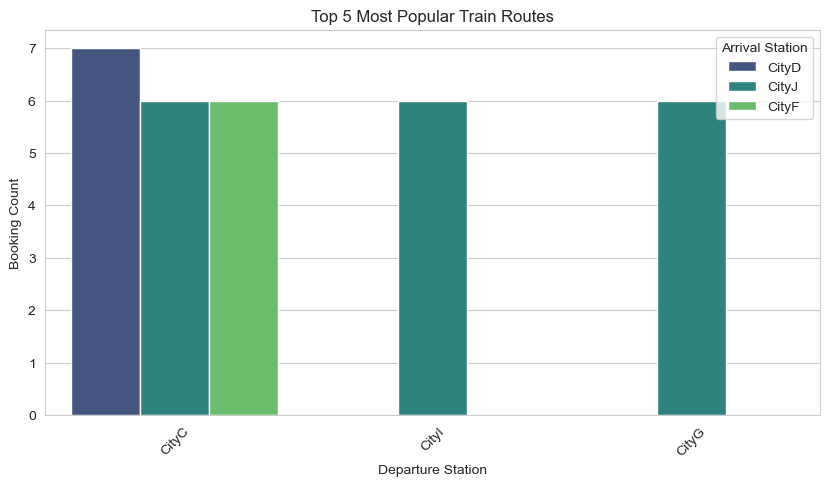

In [13]:
# Top 5 most popular train routes
if "Departure" in datasets["Booking History"].columns and "Arrival" in datasets["Booking History"].columns:
    route_counts = datasets["Booking History"].groupby(["Departure", "Arrival"]).size().reset_index(name="Count")
    top_routes = route_counts.sort_values(by="Count", ascending=False).head(5)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_routes, x="Departure", y="Count", hue="Arrival", palette="viridis")
    plt.title("Top 5 Most Popular Train Routes")
    plt.xlabel("Departure Station")
    plt.ylabel("Booking Count")
    plt.xticks(rotation=45)
    plt.legend(title="Arrival Station")
    plt.show()


# ---------------------------------
# Step 5: Customer Feedback Analysis
# ---------------------------------

/var/folders/cr/zw_bcxpn257g4khbkhrtn_vm0000gn/T/ipykernel_17778/3719972134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets["Feedback Data"]["Rating"], palette="rocket")


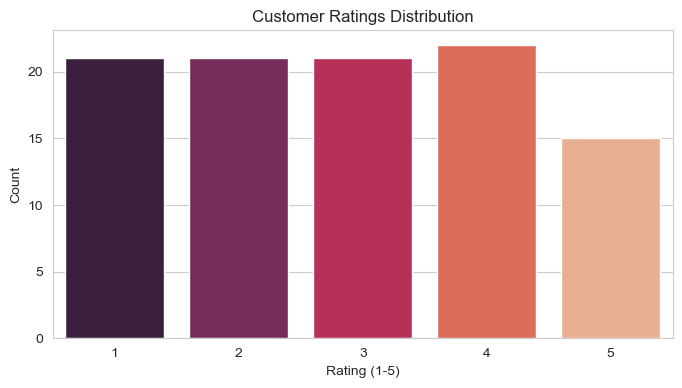

In [14]:



if "Rating" in datasets["Feedback Data"].columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=datasets["Feedback Data"]["Rating"], palette="rocket")
    plt.title("Customer Ratings Distribution")
    plt.xlabel("Rating (1-5)")
    plt.ylabel("Count")
    plt.show()




In [15]:
print("\n✅ Data Exploration Completed!")


✅ Data Exploration Completed!
